In [1]:
# lets develope a Linear regression model that learn the features influencing the 'Price' of a house
# from our training example and use it to predict the Price of the houses for which price is unknown
# in technical terms , we will try to predict the theta parameter( a coefficient of each feature) which better 
# adjust the impact of that feature on the price to provide a correct price

In [2]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [3]:
# lets load the data from pandas 
# the load_boston will return will return a sklearn.util.Bunch object which is kind of a dictionary
boston_dataset = load_boston()

In [4]:
# lets view the keys of the boston_dataset Bunch object
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [6]:
# lets now construct our dataframe of house features
house_features = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [8]:
house_features['Price'] = boston_dataset.target

In [9]:
house_features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# let learn the detailed information about the features present in the data set
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [11]:
# lets check for any Nan value in our dataset
house_features.isnull().sum()
# it seems like all our data contains well defined values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [12]:
# lets get the type information of the features
house_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [13]:
# lets study some of the basic aggregation of our dataset
house_features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
# lets make some visual explorations on our data.
# as the 'Price' feature is the one of our interest, lets try to understand its distribution and correlation with 
# other features

Text(0.5,0,'price distribution')

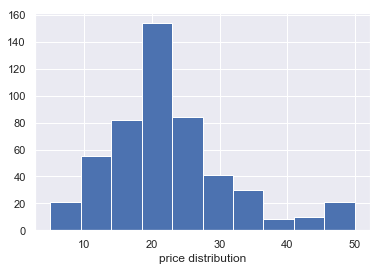

In [15]:
plt.hist(house_features['Price'])
plt.xlabel('price distribution')

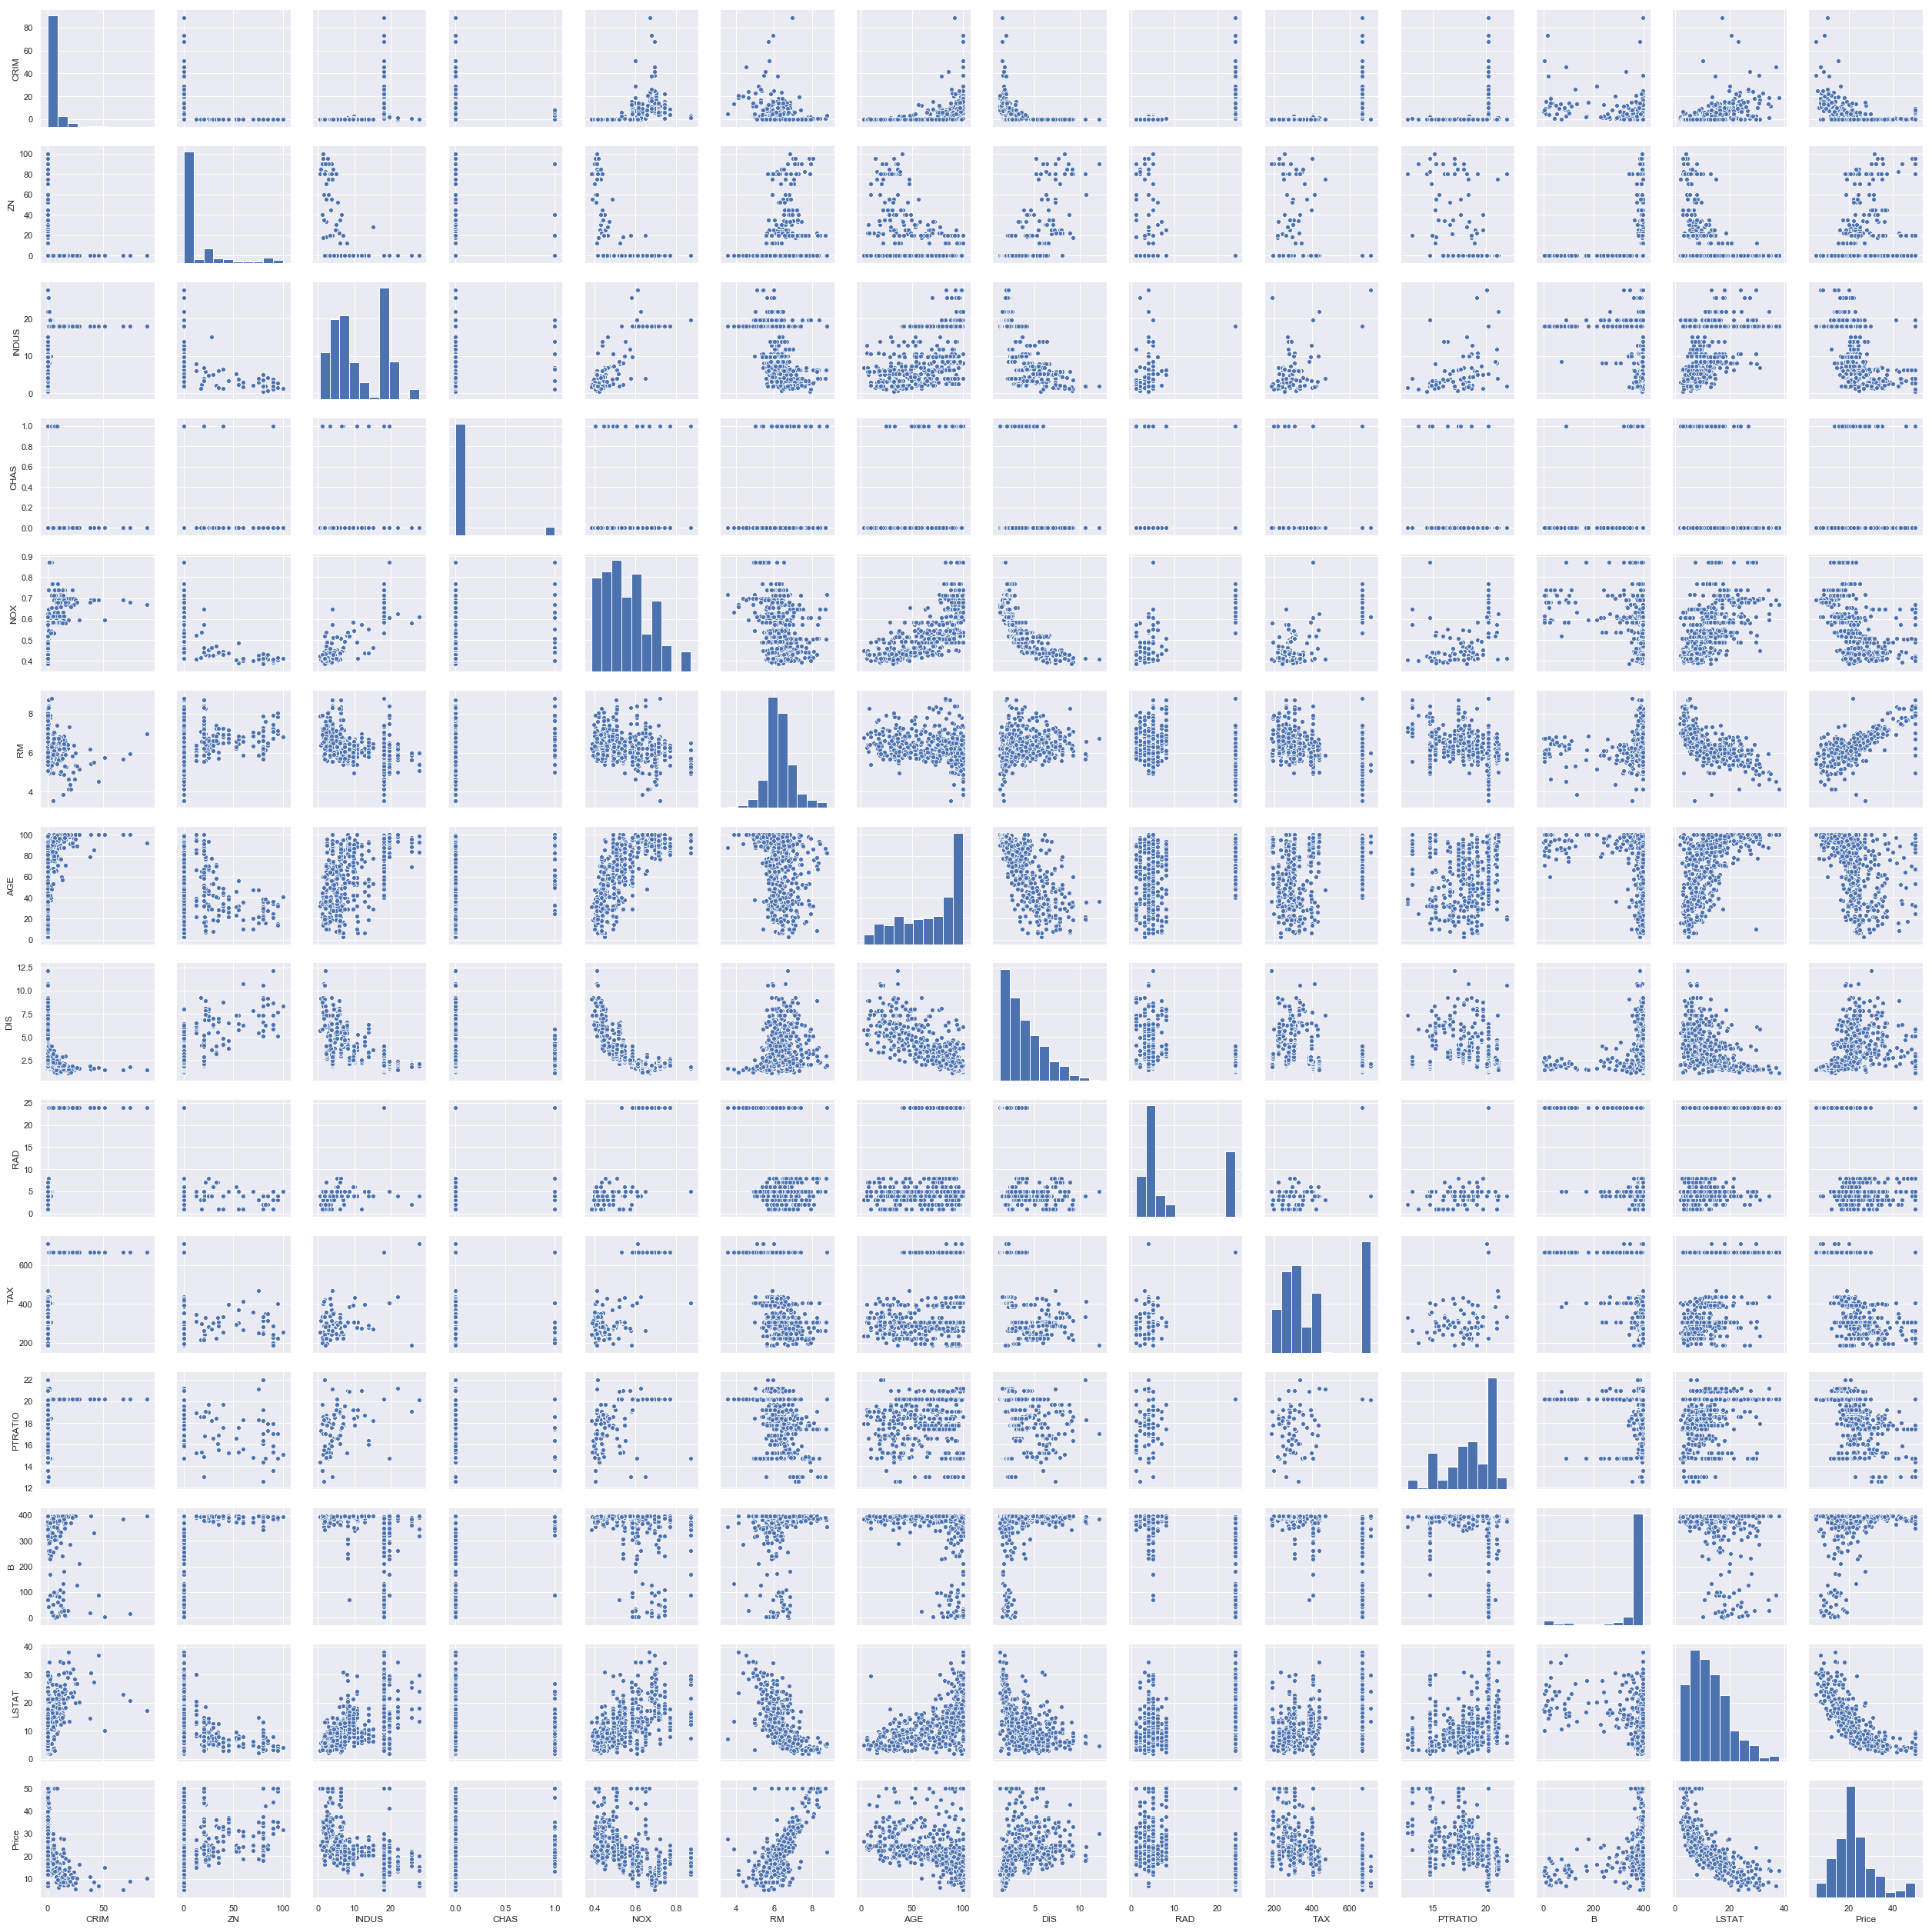

In [37]:
sns.pairplot(house_features)

In [16]:
# it seems like our price feature is more correlated with 'RM'(average number of rooms per dwelling) 
# and 'LSTAT'(% lower status of the population)
# lets better understand this using the correlation matrix

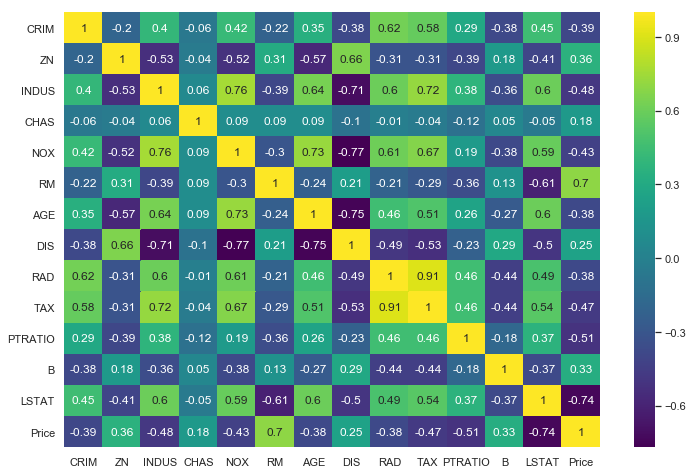

In [45]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(house_features.corr().round(2), annot=True, cmap='viridis', ax=ax)

In [17]:
# the correlation value ranges from 1 to -1. positive correlation means both feature increases together.
# negative correlation means one value decrease while the other increases and vice-versa
# from the observation it seems like our Price of the house has a high positive correlation with the 'RM' feature and 
# has a high negative correlation with the 'LSTAT' features.Lets visualize this.

Text(0.5,1,'correlation with LSTAT')

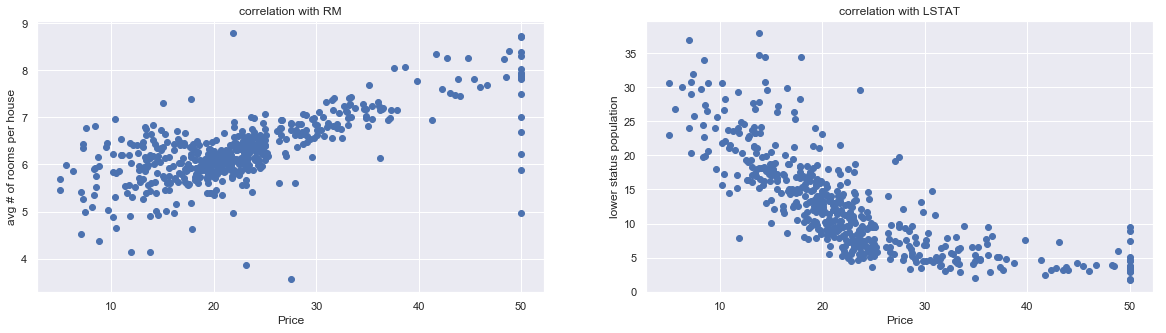

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(house_features['Price'], house_features['RM'])
ax[0].set_ylabel('avg # of rooms per house')
ax[0].set_xlabel('Price')
ax[0].set_title('correlation with RM')

ax[1].scatter(house_features['Price'], house_features['LSTAT'])
ax[1].set_ylabel('lower status population')
ax[1].set_xlabel('Price')
ax[1].set_title('correlation with LSTAT')

In [19]:
# let us consider the features that we assume will have an impact on the price and construct our sample set
X = house_features[['CRIM', 'RM', 'AGE', 'TAX', 'PTRATIO', 'LSTAT']]
y = house_features['Price']

In [20]:
# lets split our data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

In [21]:
X_train.shape

(379, 6)

In [22]:
# lets create our model instance and fit it with our train data
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# lets now evaluate our model by predicting the price of our test data and compare our result 
y_predict = model.predict(X_test)

In [24]:
mean_absolute_error(y_test, y_predict)

3.3416669577121167

In [25]:
r2_score(y_test, y_predict)

0.674072424485916

In [26]:
explained_variance_score(y_test, y_predict)

0.6740849106135736

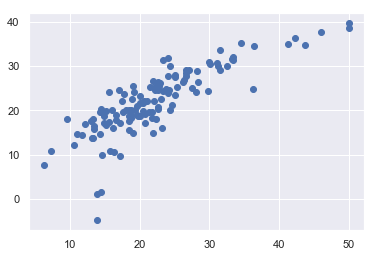

In [27]:
plt.scatter(y_test, y_predict)